In [1]:
import Pkg
Pkg.activate(".")
Pkg.add("XLSX")
using XLSX  

  Activating project at `C:\Users\Owner`
   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifest.toml`


In [2]:
xf = XLSX.readxlsx("3mT.xlsx")
df = xf["Sheet1"]
M=df["C2:F201"]
data = M

200×4 Matrix{Any}:
      3.69808e5       3.97031e5       4.65044e5       5.74216e5
      2.64438e7       2.45904e7       2.50684e7       3.77965e7
      2.5715e5        1.71653e5       1.62756e5       3.58535e5
      6.81926e5       5.04844e5       5.51416e5       1.23278e6
      1.3678e6        1.53323e6       1.12762e6       2.70758e6
      1.23053e6       1.58128e6       1.61016e6       1.50047e6
      6.95783e5  884800.0             7.72369e5       1.205e6
      2.89878e5       1.76327e5       3.53243e5       2.44836e5
      7.41966e6       5.36596e6       6.18108e6       1.46264e7
      2.26798e5       1.97177e5       1.97987e5       4.01538e5
 943798.0             8.21463e5       8.95664e5       9.71573e5
 286833.0             2.25856e5  317211.0             2.16647e5
      3.02843e5       1.12615e5       1.2818e5   294361.0
      ⋮                                          
  10004.5          3581.38         9571.1          9609.98
      3.91167e5       3.21946e5       3.30433e5 

In [37]:
Pkg.add("MultivariateStats")
using MultivariateStats


   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifest.toml`


In [6]:
m = log.(M)

200×4 Matrix{Float64}:
 12.8207   12.8918   13.0499   13.2608
 17.0905   17.0179   17.0371   17.4477
 12.4574   12.0532   12.0      12.7898
 13.4327   13.132    13.2202   14.0248
 14.1287   14.2429   13.9356   14.8116
 14.023    14.2737   14.2918   14.2213
 13.4528   13.6931   13.5572   14.002
 12.5772   12.0801   12.7749   12.4083
 15.8196   15.4956   15.637    16.4983
 12.3318   12.1919   12.196    12.9031
 13.7577   13.6188   13.7053   13.7867
 12.5667   12.3277   12.6673   12.286
 12.621    11.6317   11.7612   12.5926
  ⋮                            
  9.21079   8.1835    9.1665    9.17056
 12.8769   12.6821   12.7082   13.1568
  8.89742   9.90859  10.096     9.89946
  8.76668   8.7951    9.20305   8.4388
 11.4053   11.1601   11.2402   11.908
 10.5      10.6007   10.7984   10.8472
 11.4766   12.0894   11.526    11.246
  9.94337  10.7752   10.1952    9.19542
 11.0029   10.822    10.8492   11.5775
 12.178    13.1836   13.5501   13.0732
  7.63374   8.22212   8.2919    8.23933
  8.73323

In [13]:
Pkg.add(["Statistics","LinearAlgebra"])

   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifest.toml`


In [14]:
using LinearAlgebra
using Plots, Statistics
using Random

In [47]:
x = Array(m)

200×4 Matrix{Float64}:
 12.8207   12.8918   13.0499   13.2608
 17.0905   17.0179   17.0371   17.4477
 12.4574   12.0532   12.0      12.7898
 13.4327   13.132    13.2202   14.0248
 14.1287   14.2429   13.9356   14.8116
 14.023    14.2737   14.2918   14.2213
 13.4528   13.6931   13.5572   14.002
 12.5772   12.0801   12.7749   12.4083
 15.8196   15.4956   15.637    16.4983
 12.3318   12.1919   12.196    12.9031
 13.7577   13.6188   13.7053   13.7867
 12.5667   12.3277   12.6673   12.286
 12.621    11.6317   11.7612   12.5926
  ⋮                            
  9.21079   8.1835    9.1665    9.17056
 12.8769   12.6821   12.7082   13.1568
  8.89742   9.90859  10.096     9.89946
  8.76668   8.7951    9.20305   8.4388
 11.4053   11.1601   11.2402   11.908
 10.5      10.6007   10.7984   10.8472
 11.4766   12.0894   11.526    11.246
  9.94337  10.7752   10.1952    9.19542
 11.0029   10.822    10.8492   11.5775
 12.178    13.1836   13.5501   13.0732
  7.63374   8.22212   8.2919    8.23933
  8.73323

In [49]:
Pkg.add(["Random","Images","Colors","MAT","LinearAlgebra","MLDatasets","CairoMakie","DataFrames"])

   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifest.toml`


In [50]:
using Images, Colors, MLDatasets, CairoMakie, DataFrames

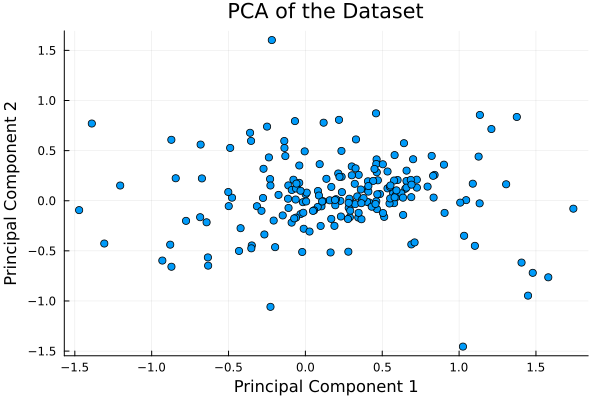

In [83]:
data = m

# 标准化数据（零均值化）
data_centered = data .- mean(data, dims=2)

# 计算协方差矩阵
cov_matrix = cov(data_centered)

# 进行特征值分解
eigvals, eigvecs = eigen(cov_matrix)

# 按照特征值排序，选择前两个主成分
sorted_indices = sortperm(eigvals, rev=true)
top_eigenvectors = eigvecs[:, sorted_indices[1:2]]  # 选择前两个主成分

# 将数据映射到前两个主成分
transformed_data = data_centered * top_eigenvectors

# 绘制PCA的前两个主成分
scatter(transformed_data[:, 1], transformed_data[:, 2],
        xlabel="Principal Component 1", ylabel="Principal Component 2",
        title="PCA of the Dataset",legend = nothing)


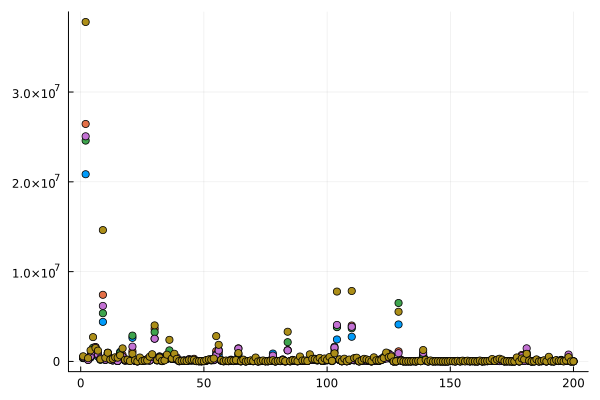

In [84]:
blank=df["A2:B201"]
F2D=df["C2:C201"]
F5PG=df["D2:D201"]
P5PG=df["E2:E201"]
Psus=df["F2:F201"]

Plots.scatter(blank[:,2],  legend = nothing)
Plots.scatter!(F2D[:,1],  legend = nothing)
Plots.scatter!(F5PG[:,1],  legend = nothing)
Plots.scatter!(P5PG[:,1],legend = nothing)
Plots.scatter!(Psus[:,1],  legend = nothing)

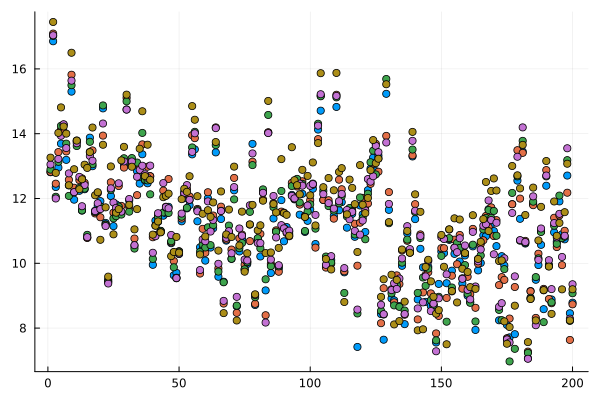

In [60]:
blank=df["A2:B201"]
F2D=df["C2:C201"]
F5PG=df["D2:D201"]
P5PG=df["E2:E201"]
Psus=df["F2:F201"]
blank=log.(blank)
F2D=log.(F2D)
F5PG=log.(F5PG)
P5PG=log.(P5PG)
Psus=log.(Psus)

Plots.scatter(blank[:,2],  legend = nothing)
Plots.scatter!(F2D[:,1],  legend = nothing)
Plots.scatter!(F5PG[:,1],  legend = nothing)
Plots.scatter!(P5PG[:,1],legend = nothing)
Plots.scatter!(Psus[:,1],  legend = nothing)

In [129]:
x1 = [Point3f(xx...) for xx in eachrow(x[1:66,1:3])]
x2 = [Point3f(xx...) for xx in eachrow(x[67:132,1:3])]
x3 = [Point3f(xx...) for xx in eachrow(x[133:200,1:3])]

68-element Vector{Point{3, Float32}}:
 [9.626908, 9.324496, 9.209883]
 [9.359249, 8.654665, 9.530397]
 [10.396336, 10.0189495, 10.149622]
 [8.412238, 8.541789, 8.434476]
 [10.693939, 10.731831, 11.145448]
 [10.326671, 10.346286, 10.437768]
 [13.331461, 13.510281, 13.779825]
 [11.82521, 11.576034, 11.621805]
 [8.268222, 9.085708, 8.6069355]
 [10.891638, 10.779816, 10.842162]
 [9.100779, 9.560788, 8.793356]
 [9.638319, 9.304595, 9.594315]
 [9.722592, 9.833432, 10.066581]
 ⋮
 [9.210794, 8.183504, 9.166504]
 [12.876891, 12.682139, 12.708159]
 [8.897415, 9.908587, 10.095992]
 [8.766683, 8.795101, 9.2030525]
 [11.405314, 11.160104, 11.24018]
 [10.500034, 10.600725, 10.7983675]
 [11.476588, 12.089421, 11.526035]
 [9.943374, 10.775222, 10.19523]
 [11.002897, 10.821952, 10.849199]
 [12.1780405, 13.183555, 13.550142]
 [7.633737, 8.222118, 8.291897]
 [8.73323, 9.074756, 9.352809]

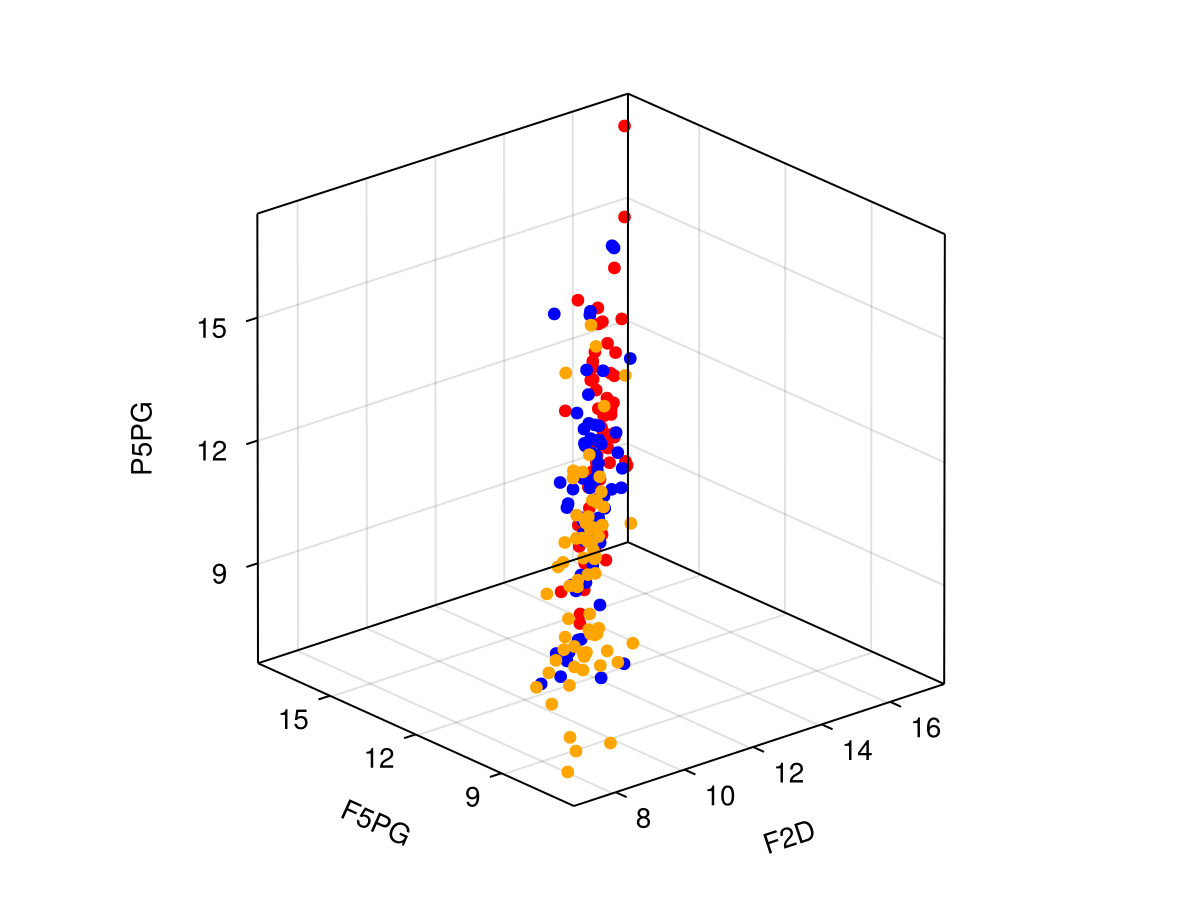

In [130]:
fig = Figure()
ax = Axis3(fig[1,1],
    aspect = (1, 1, 1),
    xlabel = "F2D",
    ylabel = "F5PG",
    zlabel = "P5PG")
CairoMakie.scatter!(ax,x1, color=:red)
CairoMakie.scatter!(ax,x2, color=:blue)
CairoMakie.scatter!(ax,x3, color=:orange)
fig

In [131]:
result = kmeans(x', 3)

Clustering.KmeansResult{Matrix{Float64}, Float64, Int64}([9.271164945989476 13.773244342110857 11.562461425787264; 9.20866665993735 13.860024978852449 11.440319990741788; 9.31763001100892 13.807194837192368 11.54225625091747; 9.34407069553324 14.135198270370832 11.910146027542696], [2, 2, 3, 2, 2, 2, 2, 3, 2, 3  …  1, 1, 3, 3, 3, 1, 3, 2, 1, 1], [3.182943845068621, 42.3816130938942, 2.159892704399681, 1.0027024412561332, 0.7469107176291345, 0.47581692842027223, 0.2107803081378279, 3.206681924753866, 15.795431658161988, 2.569910493577254  …  1.5438787562193284, 1.2581842584894503, 0.19447100429761122, 3.516891773240445, 0.8700940610485759, 3.6982371783035433, 1.2864460708376555, 4.196252759360732, 5.927033754917943, 0.32977411251795274], [62, 34, 104], [62, 34, 104], 503.3029602027559, 5, true)

In [132]:
result.assignments

200-element Vector{Int64}:
 2
 2
 3
 2
 2
 2
 2
 3
 2
 3
 2
 3
 3
 ⋮
 1
 2
 1
 1
 3
 3
 3
 1
 3
 2
 1
 1

In [133]:
xk1 = [Point3f(xx...) for (idx,xx) in enumerate(eachrow(x[:,1:3])) if result.assignments[idx] == 1]
xk2 = [Point3f(xx...) for (idx,xx) in enumerate(eachrow(x[:,1:3])) if result.assignments[idx] == 2]
xk3 = [Point3f(xx...) for (idx,xx) in enumerate(eachrow(x[:,1:3])) if result.assignments[idx] == 3]

104-element Vector{Point{3, Float32}}:
 [12.457413, 12.053228, 12.00001]
 [12.577215, 12.080097, 12.774913]
 [12.331815, 12.191856, 12.195957]
 [12.566655, 12.327651, 12.667322]
 [12.62097, 11.631729, 11.761194]
 [12.484374, 12.30527, 12.416255]
 [10.7816105, 10.878419, 10.806637]
 [11.537827, 11.579765, 11.610033]
 [12.161515, 11.635476, 11.853518]
 [11.42025, 11.754317, 11.672266]
 [11.201573, 11.189726, 11.149825]
 [12.50029, 12.265909, 12.313534]
 [11.562442, 11.384236, 11.876989]
 ⋮
 [11.726395, 11.400302, 11.335153]
 [10.8401, 11.615401, 10.278297]
 [11.331328, 10.849614, 11.250894]
 [11.822118, 12.171565, 11.553262]
 [11.9970455, 10.697178, 10.715319]
 [10.692062, 10.631716, 10.655615]
 [11.793496, 11.902012, 12.06595]
 [10.9856415, 10.9663315, 11.073881]
 [11.405314, 11.160104, 11.24018]
 [10.500034, 10.600725, 10.7983675]
 [11.476588, 12.089421, 11.526035]
 [11.002897, 10.821952, 10.849199]

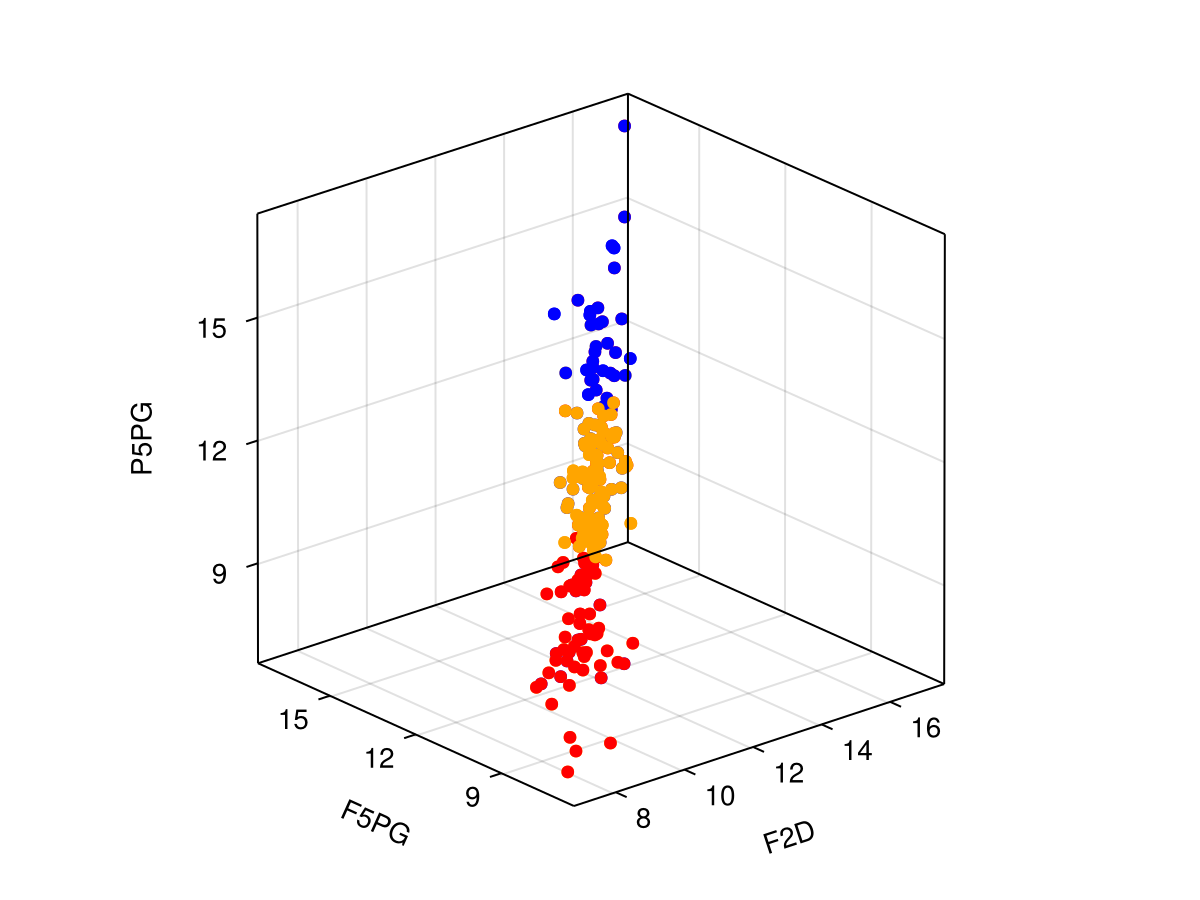

In [134]:
figk = Figure()
axk = Axis3(figk[1,1],
    aspect = (1, 1, 1),
    xlabel = "F2D",
    ylabel = "F5PG",
    zlabel = "P5PG")
CairoMakie.scatter!(ax,xk1, color=:red)
CairoMakie.scatter!(ax,xk2, color=:blue)
CairoMakie.scatter!(ax,xk3, color=:orange)
fig


In [89]:
Xtr = Matrix(m[1:2:end,1:4])'
pca3 = fit(PCA, Xtr; maxoutdim=3)

PCA(indim = 4, outdim = 3, principalratio = 0.9964463511856516)

Pattern matrix (unstandardized loadings):
──────────────────────────────────
       PC1         PC2         PC3
──────────────────────────────────
1  1.66647   0.101347   -0.193018
2  1.6642    0.0806263   0.304683
3  1.61943   0.264364   -0.0755816
4  1.75368  -0.416946   -0.0359216
──────────────────────────────────

Importance of components:
──────────────────────────────────────────────────────────
                                 PC1        PC2        PC3
──────────────────────────────────────────────────────────
SS Loadings (Eigenvalues)  11.2446    0.260504   0.13709
Variance explained          0.962417  0.0222963  0.0117334
Cumulative variance         0.962417  0.984713   0.996446
Proportion explained        0.965849  0.0223758  0.0117753
Cumulative proportion       0.965849  0.988225   1.0
──────────────────────────────────────────────────────────

In [93]:
Xte = Matrix(m[2:2:end,1:4])'
Yte = predict(pca3, Xte)

3×100 Matrix{Float64}:
 -11.7192      -4.33945   -5.81971   …   2.55076   -3.40318    4.40137
  -0.300655     0.220267  -0.471821     -1.09289   -0.486998  -0.145234
   0.00468028   0.184237  -0.209763     -0.781415  -0.537213  -0.184646

In [126]:
Yte

3×100 Matrix{Float64}:
 -11.7192      -4.33945   -5.81971   …   2.55076   -3.40318    4.40137
  -0.300655     0.220267  -0.471821     -1.09289   -0.486998  -0.145234
   0.00468028   0.184237  -0.209763     -0.781415  -0.537213  -0.184646

In [94]:
Xr = reconstruct(pca3, Yte)

4×100 Matrix{Float64}:
 17.096   13.4187  14.0864  12.6603  …  10.6048   9.75189  12.7178  8.95513
 17.0197  13.1272  14.2954  12.1085     10.6365  10.7098   13.368   9.15058
 17.0315  13.2344  14.2273  12.6904     10.6918  10.3899   13.0013  9.12717
 17.4459  14.0295  14.2     12.3805     10.812    9.25967  12.8921  9.1239

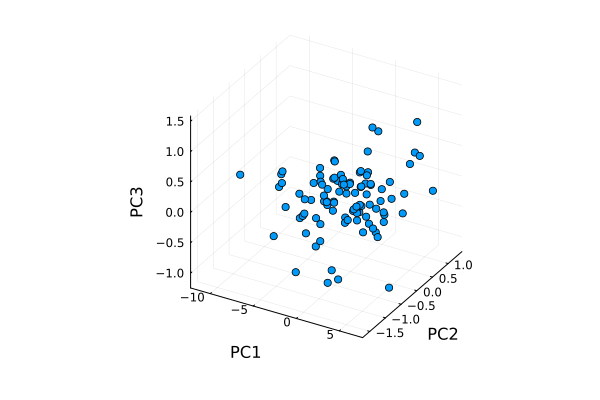

In [128]:
p = Plots.scatter(Yte[1,:],Yte[2,:],Yte[3,:],marker=:circle,linewidth=0)
Plots.plot!(p,xlabel="PC1",ylabel="PC2",zlabel="PC3",legend = nothing)